In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [32]:
data=pd.read_csv('crop_yield.csv')
data.head()
print(f"Number of rows : {len(data)}")
print(data.head())

Number of rows : 1000000
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573  

DATA CLEANING

In [33]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [34]:
# Convert booleans to integers
data['Fertilizer_Used'] = data['Fertilizer_Used'].astype(int)
data['Irrigation_Used'] = data['Irrigation_Used'].astype(int)

In [35]:

data.describe(include='all')

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000,1000000.000000,1000000.000000
unique,4,6,6,NaN,NaN,NaN,NaN,3,NaN,NaN
top,North,Sandy,Maize,NaN,NaN,NaN,NaN,Sunny,NaN,NaN
freq,250173,167119,166824,NaN,NaN,NaN,NaN,333790,NaN,NaN
mean,NaN,NaN,NaN,549.981901,27.504965,0.49994,0.499491,NaN,104.495025,4.649472
std,NaN,NaN,NaN,259.851320,7.220608,0.50000,0.500000,NaN,25.953412,1.696572
min,NaN,NaN,NaN,100.000896,15.000034,0.00000,0.000000,NaN,60.000000,-1.147613
25%,NaN,NaN,NaN,324.891090,21.254502,0.00000,0.000000,NaN,82.000000,3.417637
50%,NaN,NaN,NaN,550.124061,27.507365,0.00000,0.000000,NaN,104.000000,4.651808
75%,NaN,NaN,NaN,774.738520,33.753267,1.00000,1.000000,NaN,127.000000,5.879200


In [36]:
data.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [37]:
data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

EDA

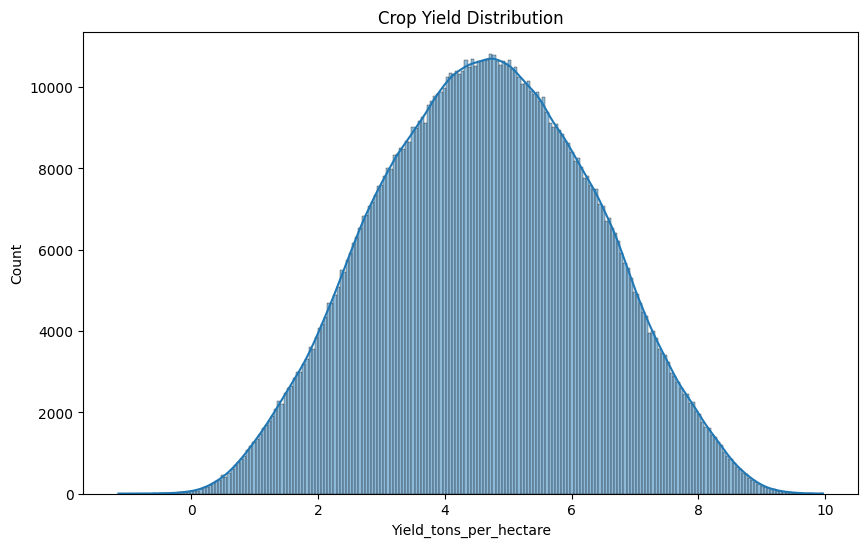

In [38]:
# Yield Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Yield_tons_per_hectare'], kde=True)
plt.title("Crop Yield Distribution")
plt.show()

In [39]:
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,0,1,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,1,1,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,0,0,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,0,1,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,1,1,Cloudy,110,7.248251


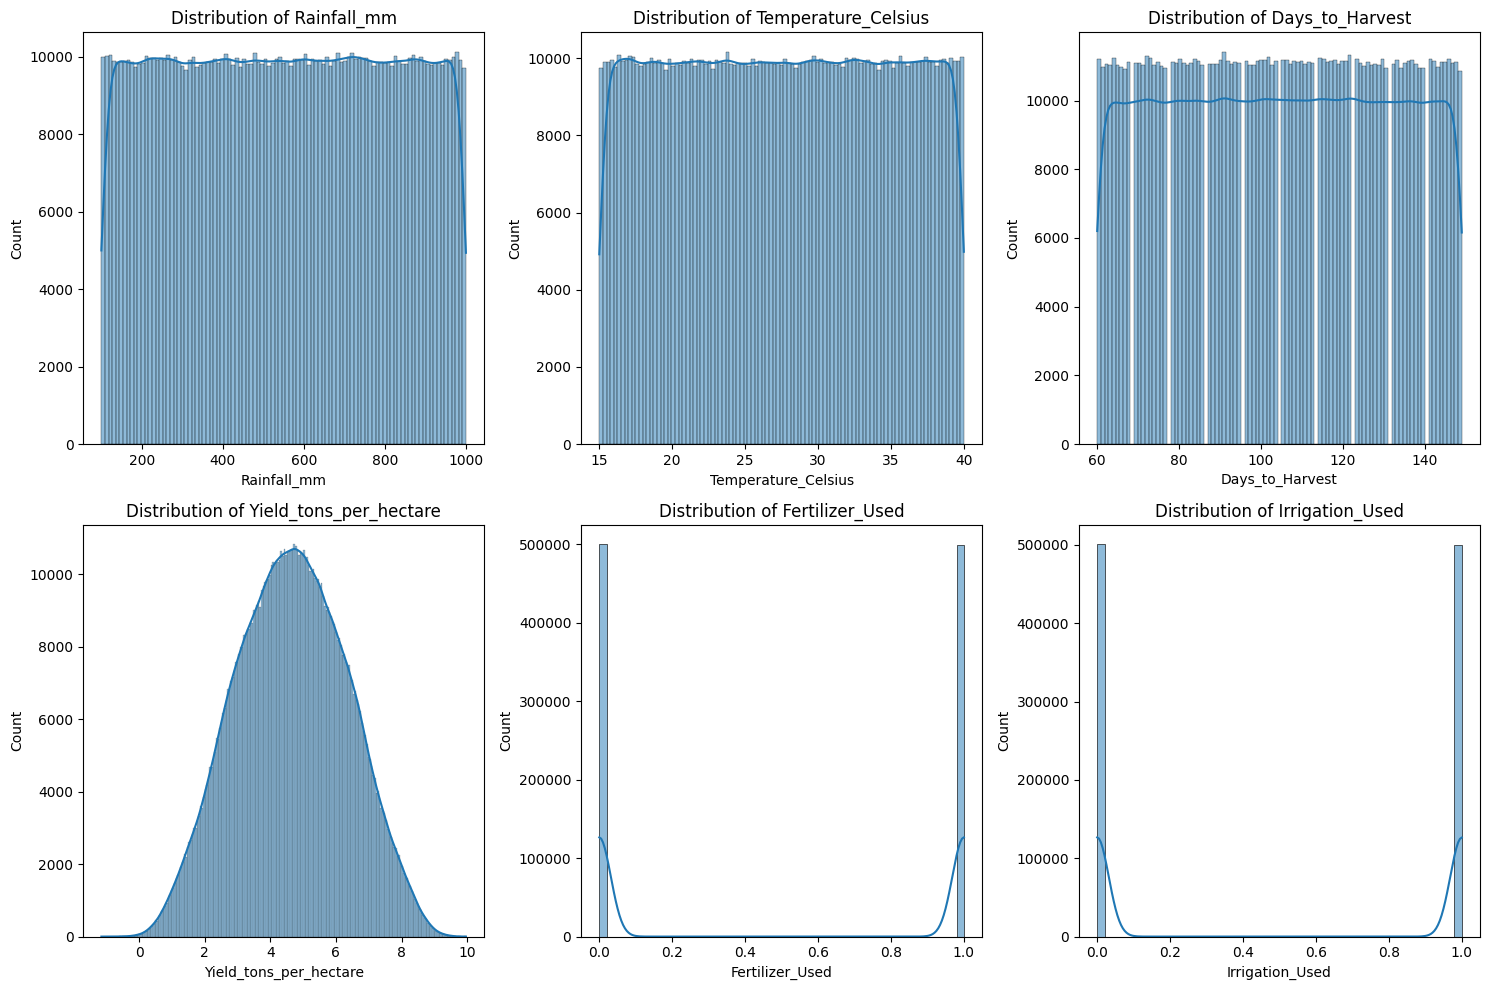

In [40]:
num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare',  'Fertilizer_Used', 'Irrigation_Used']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

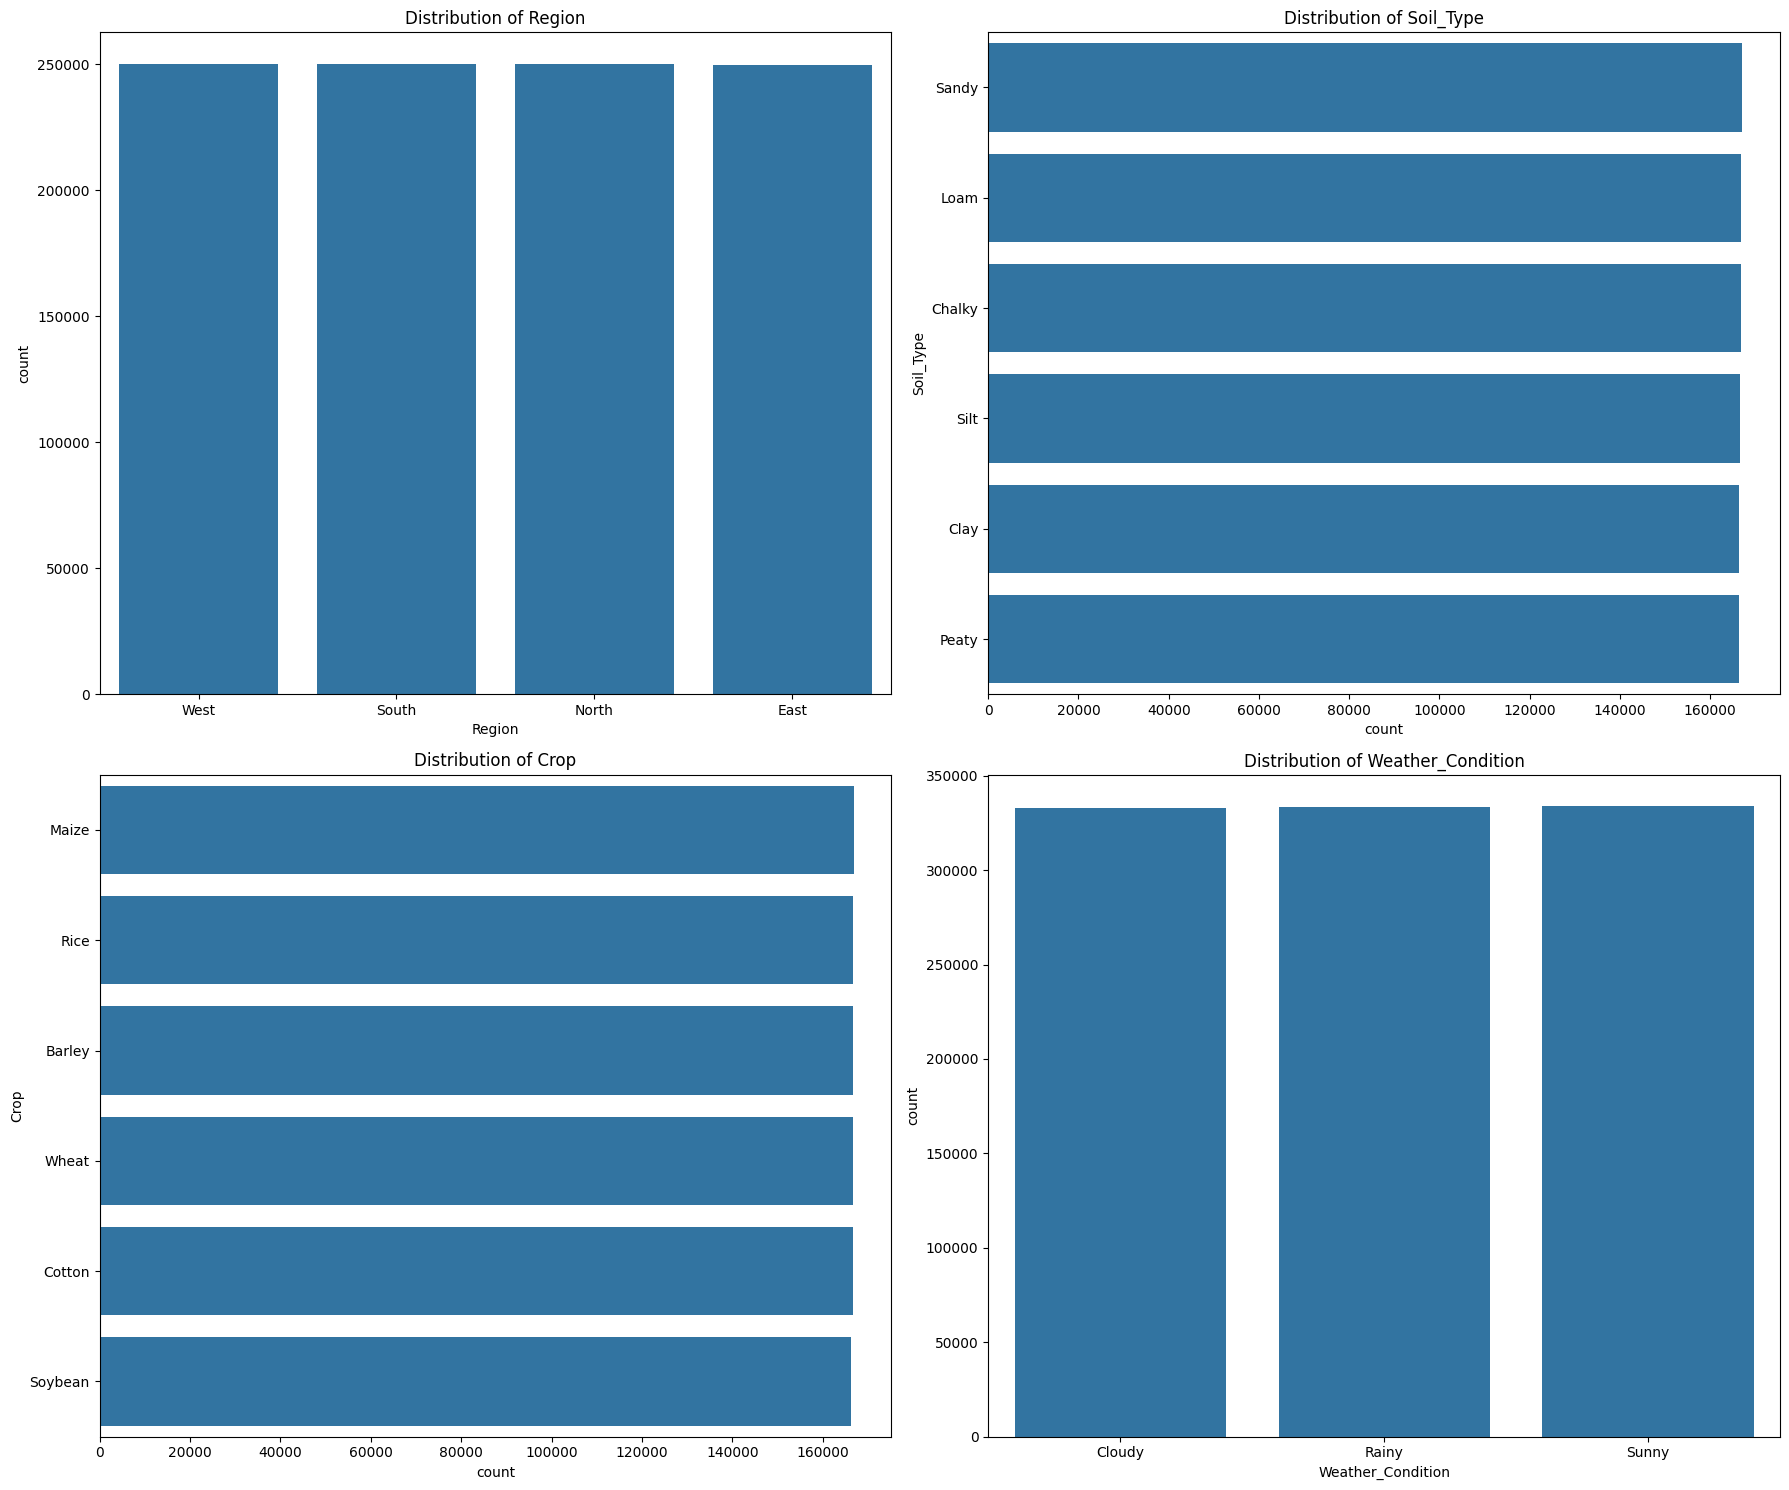

In [41]:
cat_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']

plt.figure(figsize=(18, 15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    if data[col].nunique() > 5:  # For high-cardinality features
        sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    else:
        sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

DATA PREPROCESSING

In [42]:
label_encoders = {}

categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']


for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  

In [43]:
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [44]:
#verify enconding
data[categorical_cols].head()

,Region,Soil_Type,Crop,Weather_Condition
0,3,4,1,0
1,2,1,3,1
2,1,2,0,2
3,1,4,4,1
4,2,5,5,0


In [45]:
# After fitting all label encoders, display mappings for each categorical column
print("\n=== Label Encoding Mappings ===")
for col in categorical_cols:
    print(f"\n{col} Mapping:")
    print(dict(zip(label_encoders[col].classes_, 
                 label_encoders[col].transform(label_encoders[col].classes_))))


=== Label Encoding Mappings ===

Region Mapping:
{'East': np.int64(0), 'North': np.int64(1), 'South': np.int64(2), 'West': np.int64(3)}

Soil_Type Mapping:
{'Chalky': np.int64(0), 'Clay': np.int64(1), 'Loam': np.int64(2), 'Peaty': np.int64(3), 'Sandy': np.int64(4), 'Silt': np.int64(5)}

Crop Mapping:
{'Barley': np.int64(0), 'Cotton': np.int64(1), 'Maize': np.int64(2), 'Rice': np.int64(3), 'Soybean': np.int64(4), 'Wheat': np.int64(5)}

Weather_Condition Mapping:
{'Cloudy': np.int64(0), 'Rainy': np.int64(1), 'Sunny': np.int64(2)}


DISCOVER OUTLINER

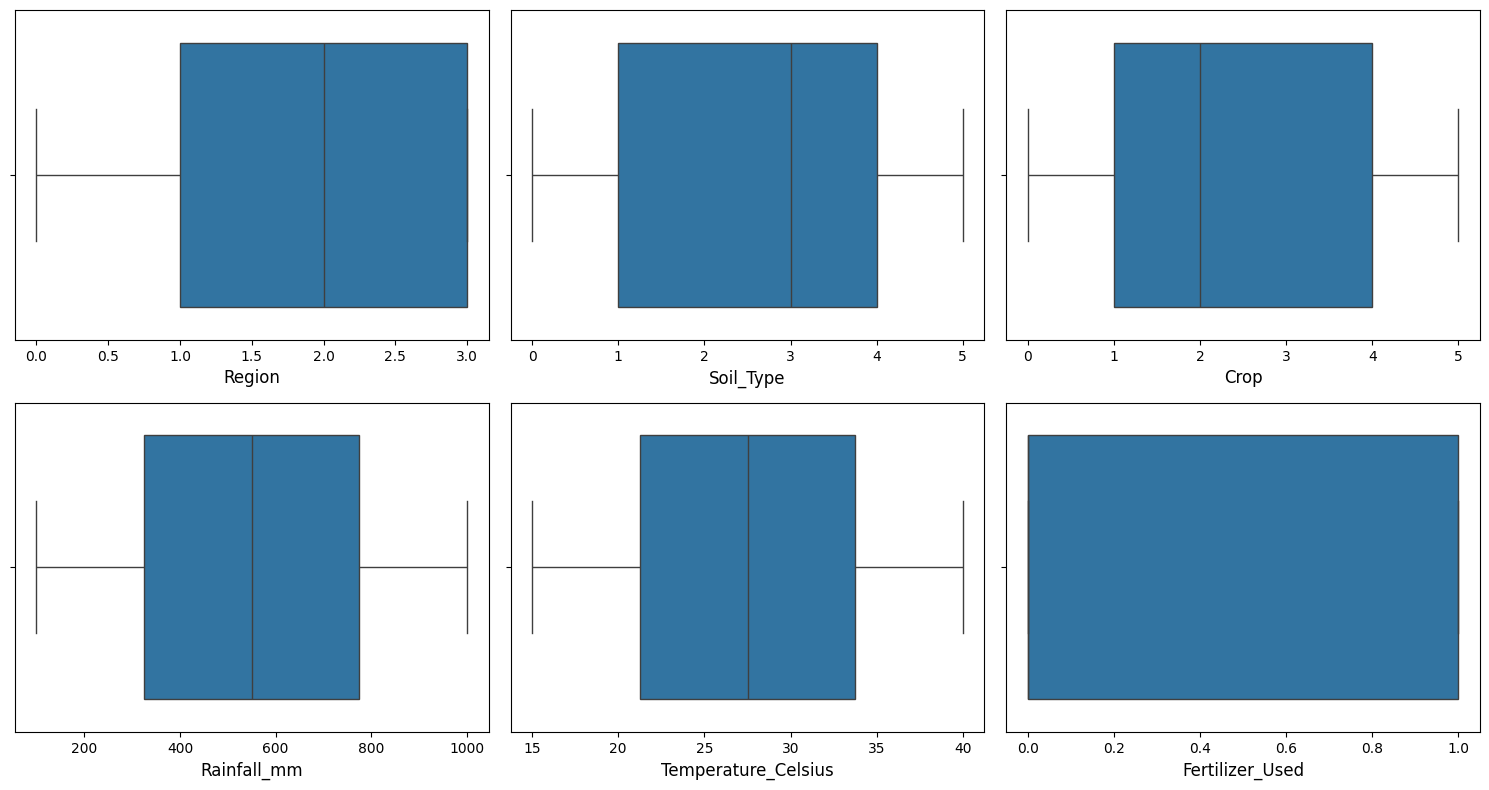

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')


In [46]:
fig,ax=plt.subplots(2,3,figsize=(15,8))
data_numeric_features=data.select_dtypes(np.number)
for variable, subplot in zip(data_numeric_features.columns, ax.flatten()):
    sns.boxplot(x=data_numeric_features[variable], orient="h", whis=1.5, ax=subplot)
    subplot.set_xlabel(variable, fontsize=12)
plt.tight_layout()
plt.show()
print(data_numeric_features.columns)


## Model Coefficients
Interpret the importance of each feature.

In [47]:
corr=data.corr(numeric_only=True)
corr

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
Region,1.000000,-0.001143,0.000494,0.000478,0.000784,0.000570,0.000217,-0.001450,-0.001169,0.000390
Soil_Type,-0.001143,1.000000,0.000869,-0.000678,0.000732,0.001364,-0.000564,0.001695,0.000602,-0.000333
Crop,0.000494,0.000869,1.000000,0.001214,0.000286,0.000871,0.000657,-0.001783,0.000329,0.001283
Rainfall_mm,0.000478,-0.000678,0.001214,1.000000,-0.000123,-0.001076,-0.000568,0.001360,-0.002669,0.764618
Temperature_Celsius,0.000784,0.000732,0.000286,-0.000123,1.000000,0.002343,-0.000484,-0.000833,-0.000731,0.085565
Fertilizer_Used,0.000570,0.001364,0.000871,-0.001076,0.002343,1.000000,0.001510,0.000643,-0.001029,0.442099
Irrigation_Used,0.000217,-0.000564,0.000657,-0.000568,-0.000484,0.001510,1.000000,-0.000556,-0.001234,0.353741
Weather_Condition,-0.001450,0.001695,-0.001783,0.001360,-0.000833,0.000643,-0.000556,1.000000,-0.000397,0.001132
Days_to_Harvest,-0.001169,0.000602,0.000329,-0.002669,-0.000731,-0.001029,-0.001234,-0.000397,1.000000,-0.002591
Yield_tons_per_hectare,0.000390,-0.000333,0.001283,0.764618,0.085565,0.442099,0.353741,0.001132,-0.002591,1.000000


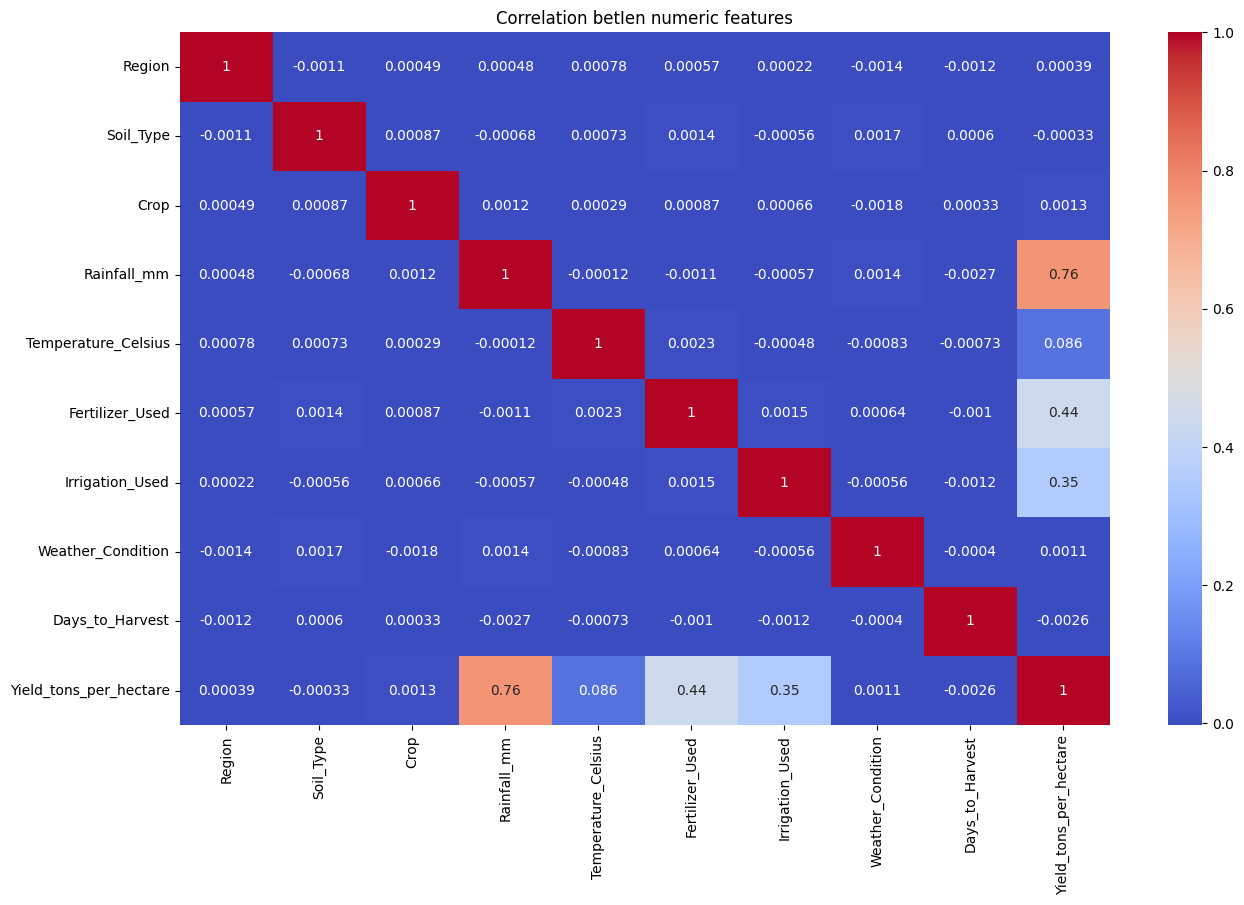

In [48]:
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation betIen numeric features')
plt.show()


Strong positive correlations with yield: Rainfall_mm


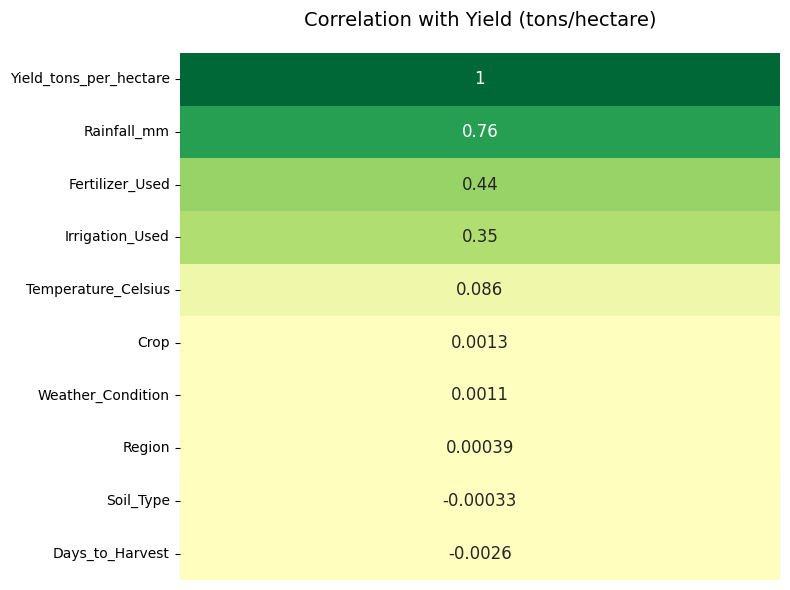

In [49]:


# Calculate correlations (numeric_only=True for safety)
corr_matrix = data.corr()

# Sort correlations with Yield_tons_per_hectare
yield_corr = corr_matrix['Yield_tons_per_hectare'].sort_values(ascending=False)
# Create a focused correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(
    yield_corr.to_frame(),  # Convert series to DataFrame for heatmap
    annot=True,
    cmap='RdYlGn',         # Red-Yellow-Green color scale
    center=0,
    vmin=-1, vmax=1,
    annot_kws={'size': 12},
    cbar=False             # Hide color bar for single column
)

# Formatting
plt.title('Correlation with Yield (tons/hectare)', pad=20, fontsize=14)
plt.xticks([])  # Remove x-axis label (we only have one column)
plt.yticks(rotation=0) 
plt.tight_layout()
# Add interpretation text
strong_pos = yield_corr[(yield_corr > 0.5) & (yield_corr < 1.0)].index.tolist()
strong_neg = yield_corr[yield_corr < -0.5].index.tolist()

if strong_pos:
    print(f"\nStrong positive correlations with yield: {', '.join(strong_pos)}")
if strong_neg:
    print(f"Strong negative correlations with yield: {', '.join(strong_neg)}")

plt.show()


MODELING


In [ ]:
X = data.drop(columns=['Yield_tons_per_hectare'])
y = data['Yield_tons_per_hectare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(f"\nTraining set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (900000, 9), Test set: (100000, 9)


In [51]:
# Scale numerical features only
num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Fertilizer_Used', 'Irrigation_Used']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\n=== Scaled Numerical Features ===")
X_train[num_cols].describe()



=== Scaled Numerical Features ===


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Fertilizer_Used,Irrigation_Used
count,9.000000e+05,9.000000e+05,9.000000e+05,9.000000e+05,9.000000e+05
mean,5.956914e-16,-7.075111e-16,-1.348768e-16,5.084328e-17,1.995836e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.731415e+00,-1.732466e+00,-1.713339e+00,-9.995557e-01,-9.994535e-01
25%,-8.662451e-01,-8.655947e-01,-8.657229e-01,-9.995557e-01,-9.994535e-01
50%,7.871498e-04,8.351687e-04,-1.810700e-02,-9.995557e-01,-9.994535e-01
75%,8.652367e-01,8.656845e-01,8.680369e-01,1.000445e+00,1.000547e+00
max,1.732126e+00,1.729829e+00,1.715653e+00,1.000445e+00,1.000547e+00


In [52]:
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [53]:
X_train.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
378046,3,5,5,0.244165,1.436176,-0.999556,1.000547,2,0.983621
510062,3,2,4,-1.260012,-1.269718,1.000445,-0.999453,0,0.598341
534815,3,1,2,0.715843,1.513650,1.000445,-0.999453,0,1.677125
342590,2,3,2,0.792188,-0.697742,-0.999556,1.000547,0,0.675397
559414,0,5,5,0.727887,-0.140294,1.000445,1.000547,0,-0.518971


## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# 1. Train/Test split (if not already done)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Fit with sklearn
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

# 3. Your existing sklearn metrics
print("Linear Regression (sklearn):")
print(f" R² Score: {r2_score(y_test, y_pred_lr):.2f}")
print(f" MSE:      {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f" Train MAE: {mae(y_train, model.predict(X_train)):.2f}")
print(f" Test  MAE: {mae(y_test,  y_pred_lr):.2f}\n")

# 4. Statsmodels OLS summary on the *same* training data:
#    a) add constant column for the intercept
X_train_sm = sm.add_constant(X_train)

#    b) fit OLS
ols_sm = sm.OLS(y_train, X_train_sm).fit()

#    c) print the full summary table
print("Statsmodels OLS Summary (training set):")
print(ols_sm.summary())


Linear Regression (sklearn):
 R² Score: 0.91
 MSE:      0.25
 Train MAE: 0.40
 Test  MAE: 0.40

Statsmodels OLS Summary (training set):
                              OLS Regression Results                              
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.913
Model:                                OLS   Adj. R-squared:                  0.913
Method:                     Least Squares   F-statistic:                 9.324e+05
Date:                    Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                            02:58:21   Log-Likelihood:            -5.8128e+05
No. Observations:                  800000   AIC:                         1.163e+06
Df Residuals:                      799990   BIC:                         1.163e+06
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                          coef    

## Actual vs Predicted Values Visualization
Scatter plot to compare actual target values with predictions.

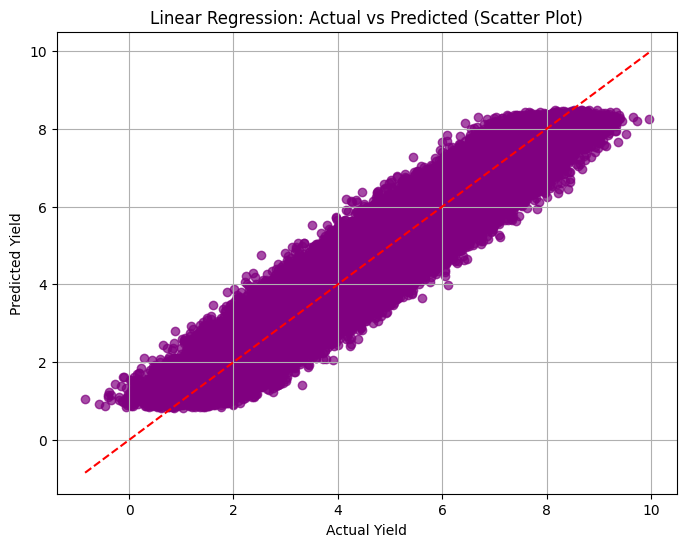

In [58]:


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression: Actual vs Predicted (Scatter Plot)")
plt.grid(True)
plt.show()

In [56]:
print(f"Intercept: {model.intercept_}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")

Intercept: 4.6511292621283165
Region: -0.000
Soil_Type: -0.000
Crop: -0.000
Rainfall_mm: 1.298
Temperature_Celsius: 0.144
Fertilizer_Used: 0.750
Irrigation_Used: 0.600
Weather_Condition: -0.000
Days_to_Harvest: 0.000
